# 20.5 8 Machine Learning (DL) Prototype 2

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [3]:
import seaborn as sns

### load processed bizbuysell dataset

In [4]:
df_in=pd.read_parquet('data/bizwiz_value_score_2.parquet')

In [5]:
#df_in=df_in[:10000]

In [6]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12143 entries, 1427 to 36567
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     12143 non-null  float64
 1   pptitle                                12143 non-null  object 
 2   ppdesc                                 12143 non-null  object 
 3   ppdetails                              12143 non-null  object 
 4   ppfinancials                           12143 non-null  object 
 5   pcategories                            12143 non-null  object 
 6   COUNTY_NAME                            12143 non-null  object 
 7   STATE_NAME                             12143 non-null  object 
 8   price                                  12143 non-null  float64
 9   cash_flow                              12143 non-null  float64
 10  gross_revenue                          12143 non-null  float64
 11  esta

### vectorize text

In [6]:
vect_text=TfidfVectorizer(stop_words='english',ngram_range=(1, 2),max_df=0.5,min_df=20)

In [7]:
text= df_in.pptitle + ' ' + df_in.ppdesc + ' ' + df_in.ppdetails + ' ' + df_in.ppfinancials 

In [8]:
%time X_text = vect_text.fit_transform(text)

CPU times: user 4.8 s, sys: 0 ns, total: 4.8 s
Wall time: 4.8 s


In [9]:
X_text.shape

(12143, 13646)

In [10]:
pca_text=PCA(1000)

In [11]:
%time X_text_pca = pca_text.fit_transform(X_text.toarray())

CPU times: user 8min 59s, sys: 2min 28s, total: 11min 27s
Wall time: 1min 12s


In [12]:
X_text_pca.shape

(12143, 1000)

### test train sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_text_pca, df_in.price,random_state=1)

### score different models

In [14]:
lm_r2_scores={}
em_r2_scores={}

In [15]:
def test_model(model, X_train, y_train, X_test, y_test):
    print(f'testing {model}...')
    regr= eval(model)()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(f'{model}: {r2}')
    return r2

In [12]:
linear_models=['LinearRegression','Ridge','RidgeCV ',
               'Lasso','LassoCV','LassoLarsCV',
               'LassoLarsIC','ElasticNet','Lars','LassoLars',
              'OrthogonalMatchingPursuit','BayesianRidge','ARDRegression','TweedieRegressor',
               'SGDRegressor','PassiveAggressiveRegressor','RANSACRegressor',
               'HuberRegressor']

In [13]:
ensemble_models=['GradientBoostingRegressor','HistGradientBoostingRegressor','RandomForestRegressor',
                'ExtraTreesRegressor','BaggingRegressor']

In [23]:
for m in linear_models:
   lm_r2_scores[m]=test_model(m,X_train, y_train, X_test, y_test)

testing LinearRegression...
LinearRegression: 0.2817734802665818
testing Ridge...
Ridge: 0.3120161214144277
testing RidgeCV ...
RidgeCV : 0.3120161214144268
testing Lasso...
Lasso: 0.2832053084346037
testing LassoCV...
LassoCV: 0.3060939811355712
testing LassoLarsCV...
LassoLarsCV: 0.2963423544930541
testing LassoLarsIC...
LassoLarsIC: 0.29969172668500454
testing ElasticNet...
ElasticNet: 0.004971881608421658
testing Lars...
Lars: 0.2996917437668374
testing LassoLars...
LassoLars: 0.2996917437668374
testing OrthogonalMatchingPursuit...
OrthogonalMatchingPursuit: 0.2579416952734289
testing BayesianRidge...
BayesianRidge: 0.31549236299247696
testing ARDRegression...
ARDRegression: -0.00023076497349339142
testing TweedieRegressor...
TweedieRegressor: 0.002422513309377816
testing SGDRegressor...
SGDRegressor: 0.3179972751764515
testing PassiveAggressiveRegressor...
PassiveAggressiveRegressor: -0.07277028935821761
testing RANSACRegressor...
RANSACRegressor: -120.6987769143425
testing HuberR

In [58]:
dfr=pd.DataFrame.from_dict(lm_r2_scores,'index')
dfr['linear model']=dfr.index
dfr['r2']=dfr[0]
dfr=dfr[dfr.r2 > 0]
dfr=dfr.sort_values('r2',ascending=False)

<Axes: xlabel='r2', ylabel='linear model'>

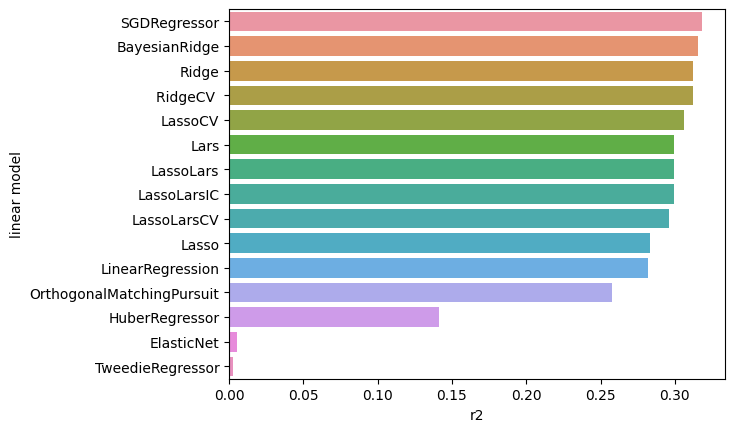

In [60]:
sns.barplot(dfr,x='r2', y='linear model',orient='h')

In [69]:
for m in ensemble_models:
   em_r2_scores[m]=test_model(m,X_train, y_train, X_test, y_test)

testing GradientBoostingRegressor...
GradientBoostingRegressor: 0.2127015639773322
testing HistGradientBoostingRegressor...
HistGradientBoostingRegressor: 0.22445836165286126
testing RandomForestRegressor...
RandomForestRegressor: 0.18559969433543821
testing ExtraTreesRegressor...
ExtraTreesRegressor: 0.20902168299531576
testing BaggingRegressor...
BaggingRegressor: 0.12911267741122257


In [70]:
dfr=pd.DataFrame.from_dict(em_r2_scores,'index')
dfr['ensemble model']=dfr.index
dfr['r2']=dfr[0]
dfr=dfr[dfr.r2 > 0]
dfr=dfr.sort_values('r2',ascending=False)

<Axes: xlabel='r2', ylabel='ensemble model'>

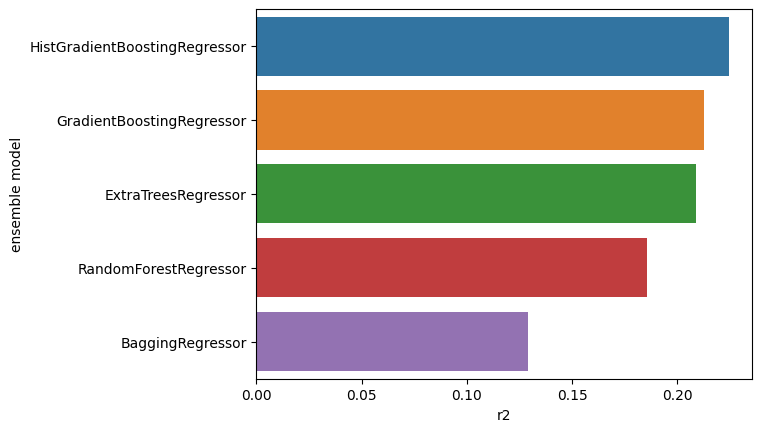

In [71]:
sns.barplot(dfr,x='r2', y='ensemble model',orient='h')

### test feature model

In [59]:
df_in.columns

Index(['id', 'pptitle', 'ppdesc', 'ppdetails', 'ppfinancials', 'pcategories',
       'COUNTY_NAME', 'STATE_NAME', 'price', 'cash_flow', 'gross_revenue',
       'established', 'POVERTY_PERCENT', 'MEDIAN_HOUSEHOLD_INCOME',
       'bizwiz_value_score', 'bizwiz_class', 'bizwiz_label', 'label_num',
       'label', 'exp(sqrt(cash_flow) - cash_flow)',
       'sqrt(cash_flow + sqrt(gross_revenue))'],
      dtype='object')

In [72]:
# X_df=df_in[['cash_flow', 'gross_revenue','established', 'POVERTY_PERCENT', 
#             'MEDIAN_HOUSEHOLD_INCOME','exp(sqrt(cash_flow) - cash_flow)']]
X_df=df_in[['cash_flow', 'gross_revenue']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_df, df_in.price,random_state=1)

In [74]:
em2_r2_scores={}

In [75]:
for m in ensemble_models:
   em2_r2_scores[m]=test_model(m,X_train, y_train, X_test, y_test)

testing GradientBoostingRegressor...
GradientBoostingRegressor: 0.6018361594177633
testing HistGradientBoostingRegressor...
HistGradientBoostingRegressor: 0.5938403493140993
testing RandomForestRegressor...
RandomForestRegressor: 0.5713444395135823
testing ExtraTreesRegressor...
ExtraTreesRegressor: 0.549593161398336
testing BaggingRegressor...
BaggingRegressor: 0.5395729008298524


In [76]:
dfr=pd.DataFrame.from_dict(em2_r2_scores,'index')
dfr['ensemble model']=dfr.index
dfr['r2']=dfr[0]
dfr=dfr[dfr.r2 > 0]
dfr=dfr.sort_values('r2',ascending=False)

<Axes: xlabel='r2', ylabel='ensemble model'>

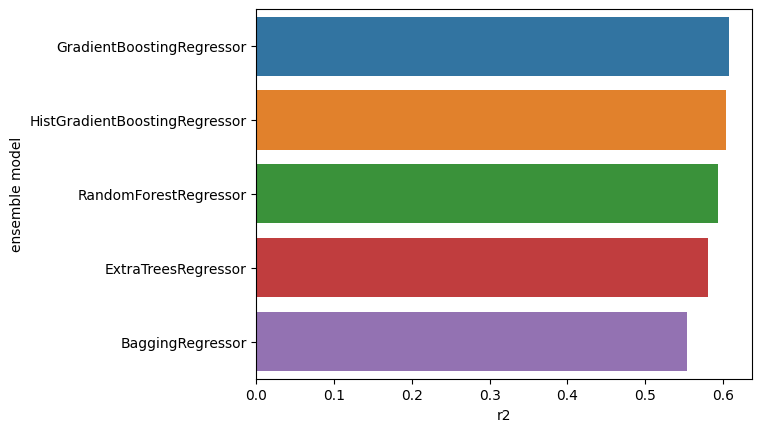

In [71]:
sns.barplot(dfr,x='r2', y='ensemble model',orient='h')